# K-Means algorithm

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

%matplotlib inline

### Podaci

Za ovaj algoritam ćemo koristiti funkciju [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) scikit-learna za generiranje slučajnih klastera

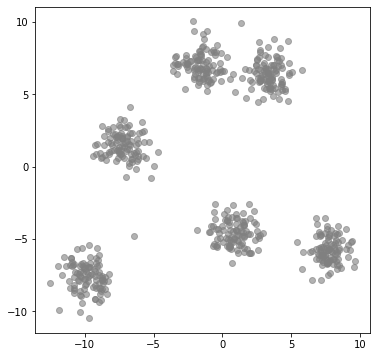

In [37]:
x, y = make_blobs(n_samples=600, centers=6, random_state=100, cluster_std=0.9)

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c='grey', alpha=0.6)
#plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.6)

# Clustering tendency - Hopkins statistic

In [38]:
#Hopkins statistics
def hopkins(X):
    
    from sklearn.neighbors import NearestNeighbors
    from numpy.random import uniform
    from random import sample
    from math import isnan
    
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]

    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values) 
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

 
    H = sum(ujd) / (sum(ujd) + sum(wjd))

    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [39]:
# def hopkins(X): X is DataFrame
df_for_H = pd.DataFrame(x)

Hopkins_stat = hopkins(df_for_H)

print('Hopkins statistic = ',Hopkins_stat)

Hopkins statistic =  0.8933416283986689


# Elbow method for estimation of optimal K

In [40]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)  
SSE

[42858.36582569369,
 24365.905563333417,
 9122.004770299354,
 4661.942312196702,
 2235.5173433813648,
 1018.7960375809757,
 949.0324514518175,
 886.7855171877414,
 820.6895816301102]

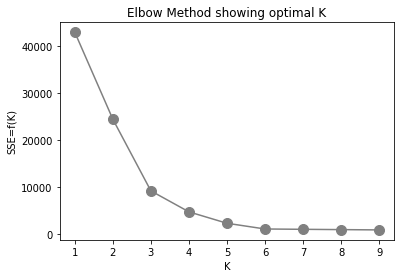

In [41]:
# Plot the elbow
plt.plot(range(1, 10), SSE, color = 'grey', marker='o', markersize=10)
plt.xlabel('K')
plt.ylabel('SSE=f(K)')
plt.title('Elbow Method showing optimal K')
plt.show()

# Implementacija K-Means u scikit-learn

[[-1.54015097  7.00431662]
 [-9.82710697 -7.60208271]
 [ 7.74068971 -5.75870758]
 [ 0.87336756 -4.58892731]
 [-7.20667768  1.47175878]
 [ 3.35680661  6.40710118]]


<Figure size 504x432 with 0 Axes>

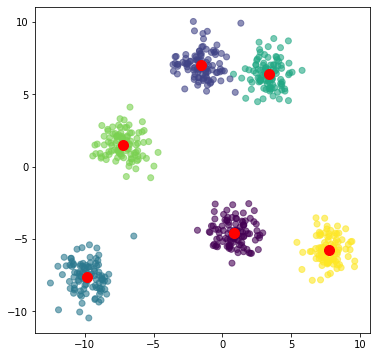

In [42]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=100)
kmeans.fit(x)
pred = kmeans.predict(x)

centroids=kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(7, 6))
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1],c=y, alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')
#plt.title('Scikit-learn')

# Prediction

In [43]:
#1 point
p1=[[-10,-6]]
pred = kmeans.predict(p1)
print(pred)

#2 points
p2=[[-10,-6], [0,-5]]
pred = kmeans.predict(p2)
print(pred)

[1]
[1 3]
